In [1]:
import pandas as pd

## Reading data

In [6]:
#THis is a dataframe. A column in a dataframe is known as a series
df = pd.read_csv('/home/manik/Downloads/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
#trying to index with something else
df = pd.read_csv('/home/manik/Downloads/Advertising.csv',index_col=1)
df.head()

,Unnamed: 0,Radio,Newspaper,Sales
TV,,,,
230.1,1,37.8,69.2,22.1
44.5,2,39.3,45.1,10.4
17.2,3,45.9,69.3,9.3
151.5,4,41.3,58.5,18.5
180.8,5,10.8,58.4,12.9


In [9]:
#To index into the data set using the unnamed column use the following
df = pd.read_csv('/home/manik/Downloads/Advertising.csv',index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
#tail method shows you the last 5 rows
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [11]:
#shape attribute gives (rows,cols)
df.shape

(200, 4)

## Visualizing the data

In [13]:
%matplotlib inline

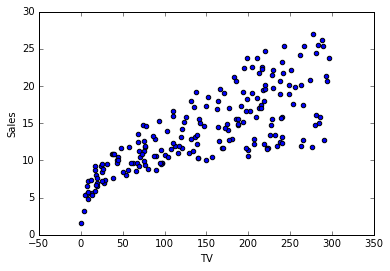

In [14]:
df.plot.scatter(x='TV',y='Sales')

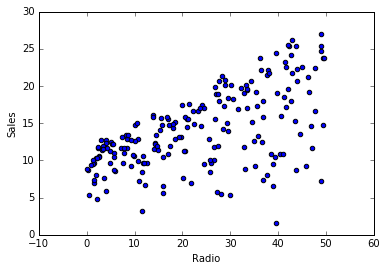

In [15]:
df.plot.scatter(x='Radio',y='Sales')

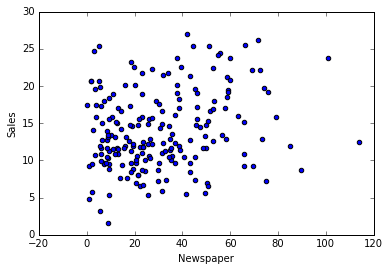

In [16]:
df.plot.scatter(x='Newspaper',y='Sales')

## Applying Linear Regression

### scikit learn expects numpy arrays as arguments and pandas is built on top of numpy arrays
### x can be a dataframe and y can be a series

In [22]:
#creating the dataframe
X = df[['TV','Radio','Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [25]:
Y = df['Sales']
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [26]:
print type(Y)
print Y.shape

<class 'pandas.core.series.Series'>
(200,)


## Split x and y into training and testing sets

In [30]:
#default is a 25% split
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

## Regressing sales on to the 3 attributes

In [31]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate model
linreg = LinearRegression()

#fit the model
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#attributes that were estimated from the model
print linreg.coef_
print linreg.intercept_

[ 0.04656457  0.17915812  0.00345046]
2.87696662232


## Making predictions

In [34]:
Y_pred = linreg.predict(X_test)

## Analysis of advertising budget of TV vs Sales

In [8]:
#trying to index with something else
df = pd.read_csv('/home/manik/Downloads/Advertising.csv',index_col=1)
df.head()

,Unnamed: 0,Radio,Newspaper,Sales
TV,,,,
230.1,1,37.8,69.2,22.1
44.5,2,39.3,45.1,10.4
17.2,3,45.9,69.3,9.3
151.5,4,41.3,58.5,18.5
180.8,5,10.8,58.4,12.9


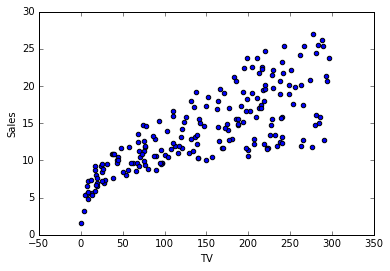

In [40]:
df.plot.scatter(x='TV',y='Sales')

In [43]:
x_tv = df[['TV']]
print type(x_tv)
print x_tv.shape

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [44]:
Y = df['Sales']

### Not splitting the data

In [45]:
linreg.fit(x_tv,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print linreg.coef_
print linreg.intercept_
c = linreg.intercept_
m = linreg.coef_

[ 0.04753664]
7.03259354913


In [47]:
import matplotlib.pyplot as plt

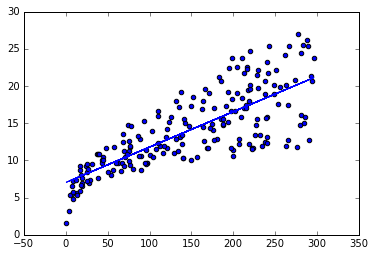

In [63]:
plt.scatter(x_tv,Y)
plt.plot(x_tv,m*x_tv + c,'-')

### Making a contour plot

#### I need different values of B0 and B1 and RSS

In [64]:
import numpy as np

In [67]:
#I'll try B0 between 5 and 9 since I know the optimal value is around 7
B0 = np.arange(5,9,0.01)

#I'll try B1 between 0.02 and 0.06
B1 = np.arange(0.02,0.06,0.0001)

print B0.shape
print B1.shape

(400,)
(400,)


In [ ]:
def rss(x,y):
    sum = 0
    for(b0 in B0 and b1 in B1):
        y_pred = b0 + b1*x
        sum = (y-ypred)**2
    return sum

    
    